# Profile Harmonic Balance Procedure

This notebook provides a couple different ways to profile the harmonic balance procedure in QMix:

1. pycallgraph
2. cProfile + gprof2dot
3. snakeviz

I find that the second option provides the best heat maps.

In [1]:
%matplotlib inline
%load_ext snakeviz

import qmix

from pycallgraph import PyCallGraph
from pycallgraph import Config
from pycallgraph.output import GraphvizOutput

import cProfile, pstats, io
from pstats import SortKey

from IPython.display import Image

config = Config(max_depth=10)

In [2]:
# Setup
resp = qmix.respfn.RespFnPolynomial(50, verbose=False)
num_b = (10, 5, 5, 5)

# 1 tone

In [3]:
# Setup
cct = qmix.circuit.EmbeddingCircuit(1, 1)
cct.freq[1] = 0.3
cct.vt[1,1] = 0.3
cct.zt[1,1] = 0.5 - 1j*0.3

In [4]:
# with PyCallGraph(output=GraphvizOutput(output_file='results/pycall-harmonic-balance-1tone.png')):
#     qmix.harmonic_balance.harmonic_balance(cct, resp, num_b=num_b, verbose=False)
    
# Image(filename='results/pycall-harmonic-balance-1tone.png') 

In [18]:
profiler = cProfile.Profile()
profiler.enable()

qmix.harmonic_balance.harmonic_balance(cct, resp, num_b=num_b, verbose=False)

profiler.disable()
s = io.StringIO()
sortby = SortKey.TIME
ps = pstats.Stats(profiler, stream=s).sort_stats(sortby)
ps.print_stats()
# print(s.getvalue())

profiler.dump_stats('results/profiler-harmonic-balance-1tone.prof')

In [19]:
%%bash
gprof2dot -f pstats results/profiler-harmonic-balance-1tone.prof | dot -Tpng -o results/prof-harmonic-balance-1tone.png

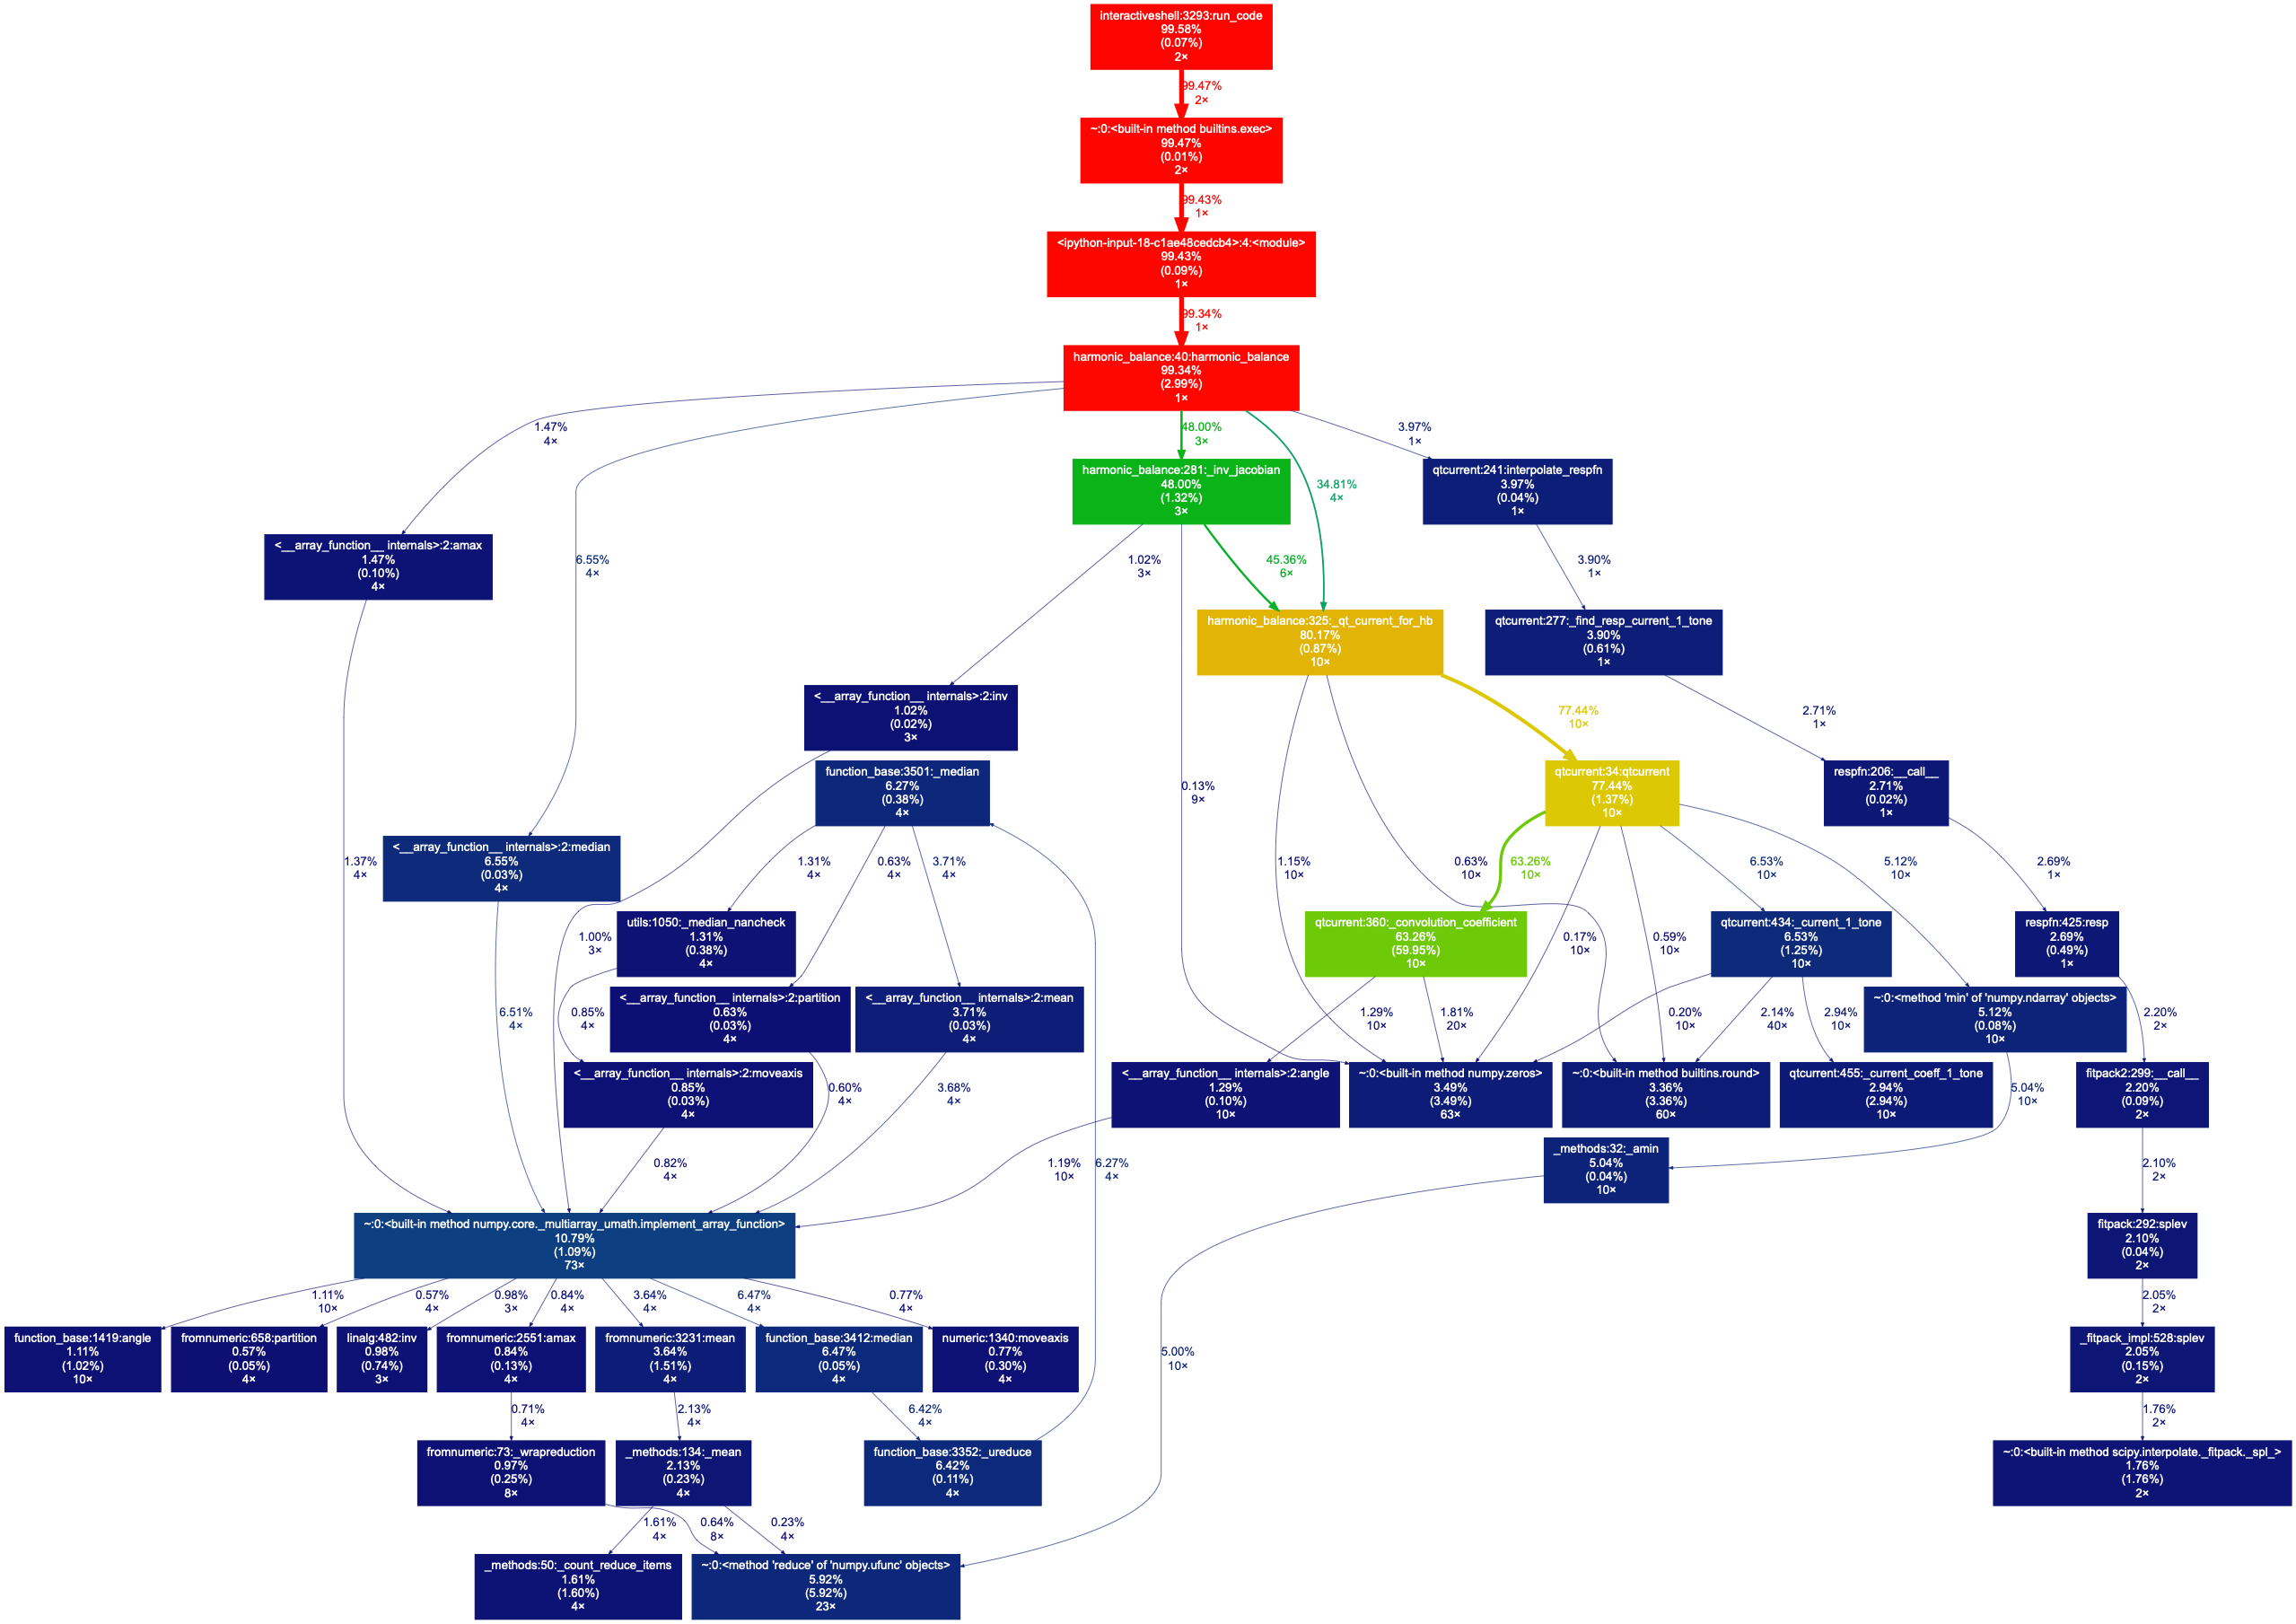

In [20]:
Image(filename='results/prof-harmonic-balance-1tone.png') 

In [45]:
# %%snakeviz
# qmix.harmonic_balance.harmonic_balance(cct, resp, num_b=num_b, verbose=False)

# 2 tones

In [24]:
# Setup
cct = qmix.circuit.EmbeddingCircuit(2, 1)
cct.freq[1] = 0.30
cct.freq[2] = 0.33
cct.vt[1,1] = 0.3
cct.vt[2,1] = 0.03
cct.zt[1,1] = 0.5 - 1j*0.3
cct.zt[2,1] = 0.5 - 1j*0.3

In [25]:
# with PyCallGraph(output=GraphvizOutput(output_file='results/pycall-harmonic-balance-2tone.png')):
#     qmix.harmonic_balance.harmonic_balance(cct, resp, num_b=num_b, verbose=False)
    
# Image(filename='results/pycall-harmonic-balance-2tone.png') 

In [27]:
profiler = cProfile.Profile()
profiler.enable()

qmix.harmonic_balance.harmonic_balance(cct, resp, num_b=num_b, verbose=False)

profiler.disable()
s = io.StringIO()
sortby = SortKey.TIME
ps = pstats.Stats(profiler, stream=s).sort_stats(sortby)
ps.print_stats()
# print(s.getvalue())
profiler.dump_stats('results/profiler-harmonic-balance-2tone.prof')

In [28]:
%%bash
gprof2dot -f pstats results/profiler-harmonic-balance-2tone.prof | dot -Tpng -o results/prof-harmonic-balance-2tone.png

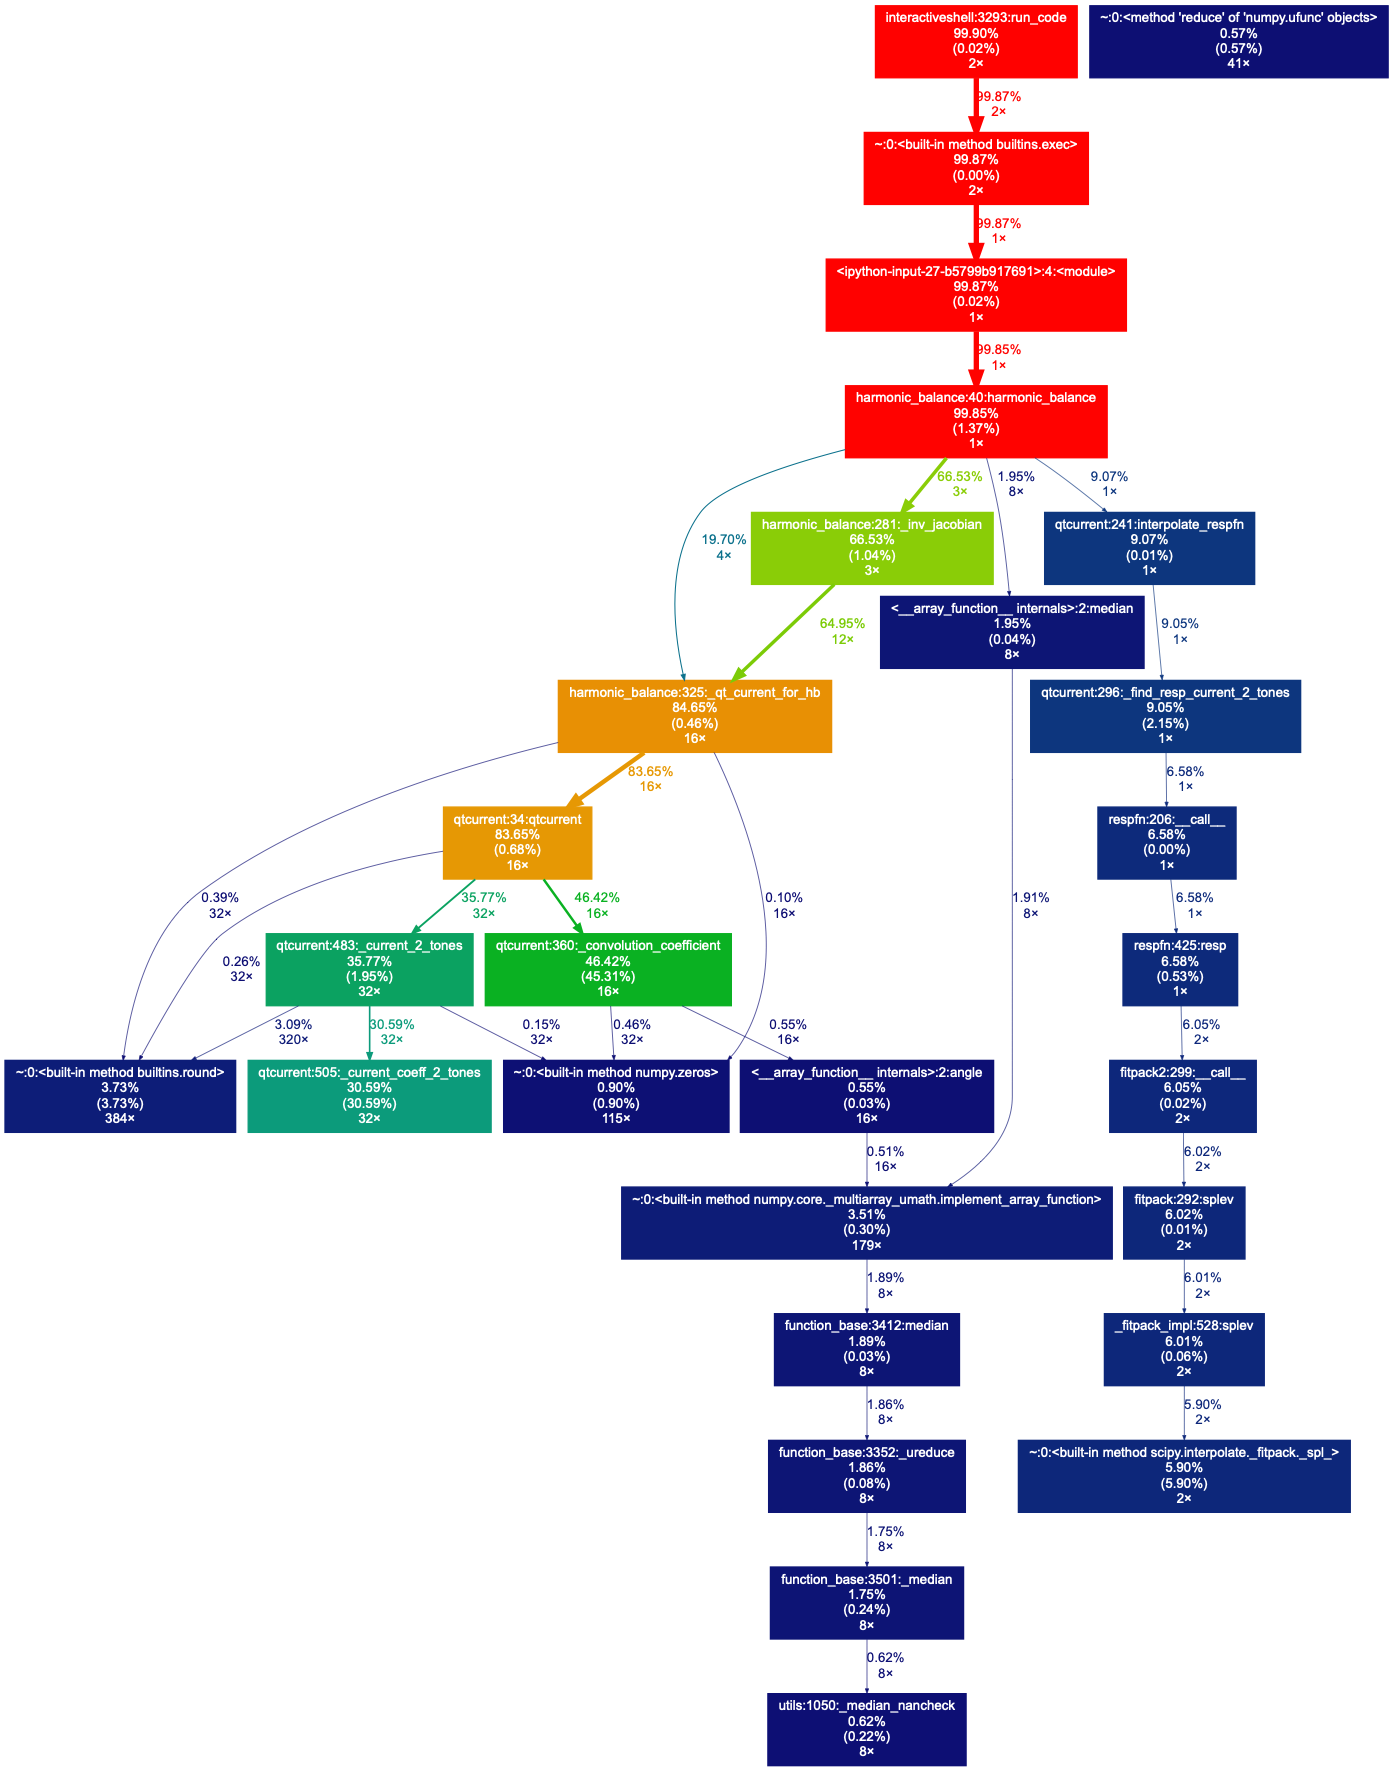

In [29]:
Image(filename='results/prof-harmonic-balance-2tone.png') 

In [44]:
# %%snakeviz
# qmix.harmonic_balance.harmonic_balance(cct, resp, num_b=num_b, verbose=False)

# 3 tones

In [31]:
# Setup
cct = qmix.circuit.EmbeddingCircuit(3, 1)
cct.freq[1] = 0.30
cct.freq[2] = 0.33
cct.freq[3] = 0.27
cct.vt[1,1] = 0.3
cct.vt[2,1] = 0.03
cct.vt[3,1] = 0.03
cct.zt[1,1] = 0.5 - 1j*0.3
cct.zt[2,1] = 0.5 - 1j*0.3
cct.zt[3,1] = 0.5 - 1j*0.3

In [32]:
# with PyCallGraph(output=GraphvizOutput(output_file='results/pycall-harmonic-balance-3tone.png')):
#     qmix.harmonic_balance.harmonic_balance(cct, resp, num_b=num_b, verbose=False)
    
# Image(filename='results/pycall-harmonic-balance-3tone.png') 

In [33]:
profiler = cProfile.Profile()
profiler.enable()

qmix.harmonic_balance.harmonic_balance(cct, resp, num_b=num_b, verbose=False)

profiler.disable()
s = io.StringIO()
sortby = SortKey.TIME
ps = pstats.Stats(profiler, stream=s).sort_stats(sortby)
ps.print_stats()
# print(s.getvalue())
profiler.dump_stats('results/profiler-harmonic-balance-3tone.prof')

In [34]:
%%bash
gprof2dot -f pstats results/profiler-harmonic-balance-3tone.prof | dot -Tpng -o results/prof-harmonic-balance-3tone.png

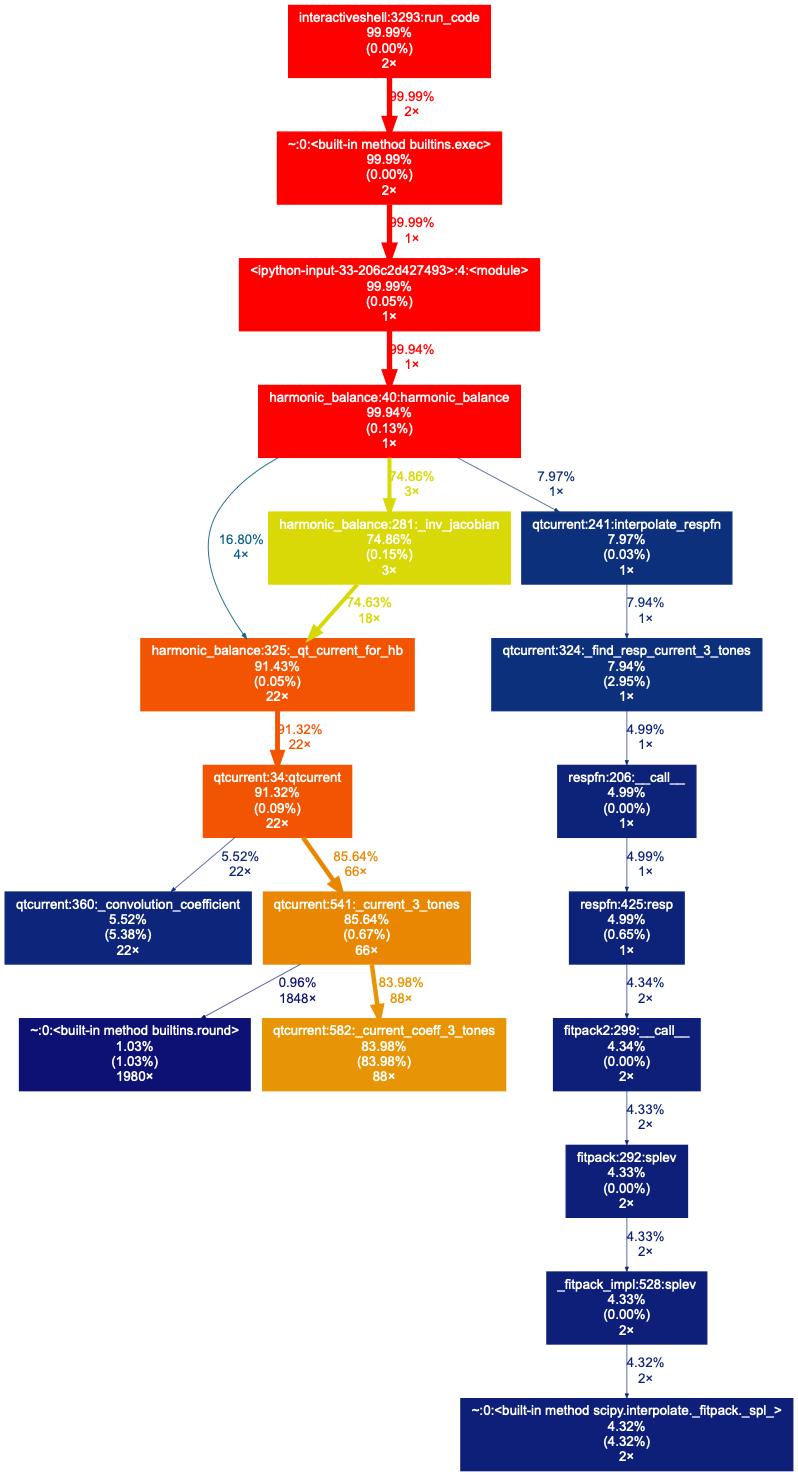

In [35]:
Image(filename='results/prof-harmonic-balance-3tone.png') 

In [43]:
# %%snakeviz
# qmix.harmonic_balance.harmonic_balance(cct, resp, num_b=num_b, verbose=False)

# 4 tones

In [37]:
# Setup
cct = qmix.circuit.EmbeddingCircuit(4, 1)
cct.freq[1] = 0.30
cct.freq[2] = 0.33
cct.freq[3] = 0.27
cct.freq[4] = 0.03
cct.vt[1,1] = 0.3
cct.vt[2,1] = 0.03
cct.vt[3,1] = 0.03
cct.zt[1,1] = 0.5 - 1j*0.3
cct.zt[2,1] = 0.5 - 1j*0.3
cct.zt[3,1] = 0.5 - 1j*0.3
cct.zt[4,1] = 1.

In [38]:
# with PyCallGraph(output=GraphvizOutput(output_file='results/pycall-harmonic-balance-4tone.png')):
#     qmix.harmonic_balance.harmonic_balance(cct, resp, num_b=num_b, verbose=False)
    
# Image(filename='results/pycall-harmonic-balance-4tone.png') 

In [39]:
profiler = cProfile.Profile()
profiler.enable()

qmix.harmonic_balance.harmonic_balance(cct, resp, num_b=num_b, verbose=False)

profiler.disable()
s = io.StringIO()
sortby = SortKey.TIME
ps = pstats.Stats(profiler, stream=s).sort_stats(sortby)
ps.print_stats()
# print(s.getvalue())
profiler.dump_stats('results/profiler-harmonic-balance-4tone.prof')

In [40]:
%%bash
gprof2dot -f pstats results/profiler-harmonic-balance-4tone.prof | dot -Tpng -o results/prof-harmonic-balance-4tone.png

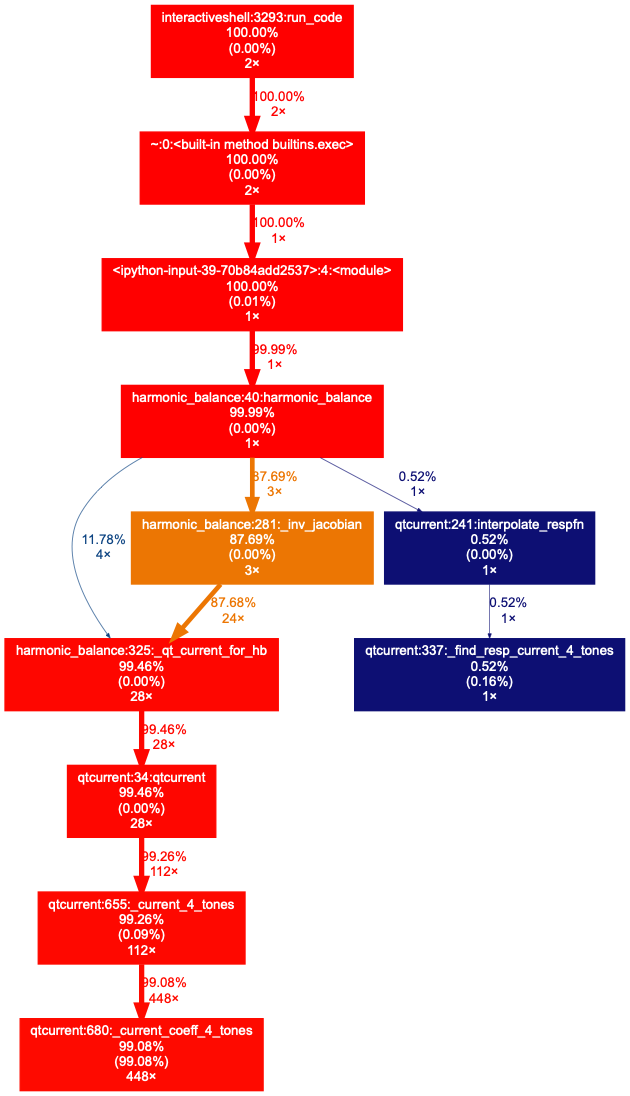

In [41]:
Image(filename='results/prof-harmonic-balance-4tone.png') 

In [42]:
# %%snakeviz
# qmix.harmonic_balance.harmonic_balance(cct, resp, num_b=num_b, verbose=False)